<a href="https://colab.research.google.com/github/Aishwarya-M25/Customer-Churn-Prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [26]:
dataset = pd.read_csv("/Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn
No     5174
Yes    1869
Name: count, dtype: int64


/tmp/ipython-input-4106061530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=dataset, palette='coolwarm')


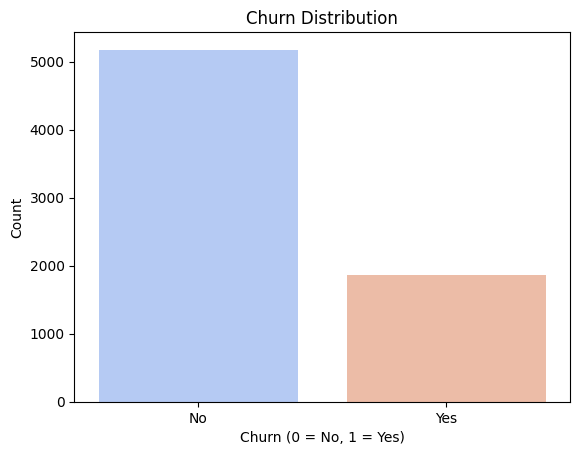

In [27]:
# Check class distribution
print(dataset['Churn'].value_counts())

# Plot distribution
plt.figure()
sns.countplot(x='Churn', data=dataset, palette='coolwarm')

plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.show()


In [28]:




# 3️ Fix TotalCharges Column


dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())



# 4️ Encoding Categorical Data


labelencoder = LabelEncoder()

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    dataset[col] = labelencoder.fit_transform(dataset[col])



# 5️ Split Features & Target


X = dataset.drop(['customerID', 'Churn'], axis=1)
y = dataset['Churn']


# 6️ Train-Test Split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 7️ Scaling (Optional for RF)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 8 Model Training


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(clf)



RandomForestClassifier(random_state=42)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

#  Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))





Accuracy: 0.7963094393186657

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409


Confusion Matrix:

[[946  90]
 [197 176]]


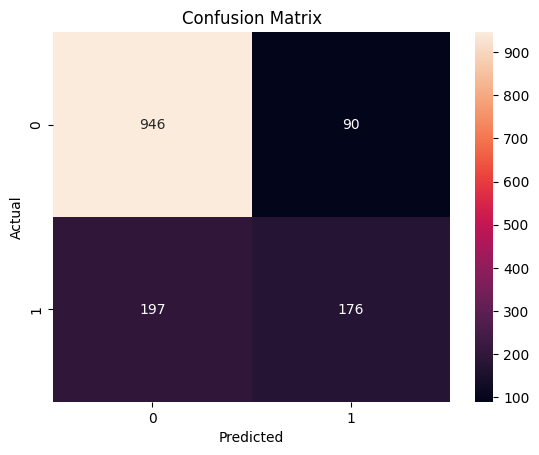

In [30]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()